# <font color = 'green'> ***Car MPG Prediction*** </font>

# <font color='green'> Table Of Contents </font>
- #### <font color='green'> **[Libraries](#module1)** </font>
- #### <font color='green'> **[Dataset](#module2)** </font>
- #### <font color='green'> **[Data Cleaning](#module3)** </font>
- #### <font color='green'> **[Train & Test Split](#module4)** </font>
- #### <font color='green'> **[Linear Regression](#module5)** </font>
- #### <font color='green'> **[Linear Regression - OLS method](#module6)** </font>
- #### <font color='green'> **[Further Analysis](#module7)** </font>

## <a id='module1'><font color='green'>Libraries</font></a>

In [1]:
# to handle data in form of rows and columns
import pandas as pd
import numpy as np

#importing seaborn for statistical plots
import seaborn as sns

# importing ploting libraries
import matplotlib.pyplot as plt

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

## <a id='module2'><font color='green'>Dataset</font></a>

In [12]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("car-mpg.csv")

In [14]:
# Few sample records from dataset
df.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
7,14.0,8,440.0,215,4312,8.5,70,1,0,plymouth fury iii
250,19.4,8,318.0,140,3735,13.2,78,1,0,dodge diplomat
146,28.0,4,90.0,75,2125,14.5,74,1,1,dodge colt
75,14.0,8,318.0,150,4077,14.0,72,1,0,plymouth satellite custom (sw)
387,38.0,6,262.0,85,3015,17.0,82,1,0,oldsmobile cutlass ciera (diesel)
49,23.0,4,122.0,86,2220,14.0,71,1,1,mercury capri 2000
163,18.0,6,225.0,95,3785,19.0,75,1,0,plymouth fury
80,22.0,4,122.0,86,2395,16.0,72,1,1,ford pinto (sw)
69,12.0,8,350.0,160,4456,13.5,72,1,0,oldsmobile delta 88 royale
12,15.0,8,400.0,150,3761,9.5,70,1,0,chevrolet monte carlo


In [16]:
# Shape of dataset
df.shape

(398, 10)

In [19]:
# Checking Datatypes
df.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car_type      int64
car_name     object
dtype: object

## <a id='module3'><font color='green'>Data Cleaning</font></a>

In [22]:
print(sorted(df['hp'].unique()))

['100', '102', '103', '105', '107', '108', '110', '112', '113', '115', '116', '120', '122', '125', '129', '130', '132', '133', '135', '137', '138', '139', '140', '142', '145', '148', '149', '150', '152', '153', '155', '158', '160', '165', '167', '170', '175', '180', '190', '193', '198', '200', '208', '210', '215', '220', '225', '230', '46', '48', '49', '52', '53', '54', '58', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '?']


In [25]:
# identified "?" as the garbage value.
# Replacing it with nan value
df['hp'] = df['hp'].replace("?", "nan").astype('float')

In [27]:
# Dropping the car name column as it is useless for the model
df.drop(columns = 'car_name', inplace = True)

In [33]:
df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
car_type    0
dtype: int64

<font color='blue'> ***Inference*** </font>
- Out of the 398 rows 6 have NAN in the hp column.
note: HP is missing becauses of the non-numeric values in the column. 
- instead of dropping the rows, lets replace the missing values with median value.

<font color='blue'> ***Points*** </font>
- Replace the missing values in 'hp' with mean value using Scikit Learn KnnImputer library.
- Each sample’s missing values are imputed using the mean value from nearest neighbors found in the set.

In [36]:
from sklearn.impute import KNNImputer
knn = KNNImputer()
knn.fit(df)
df = pd.DataFrame(knn.transform(df), columns = df.columns)
df.isnull().sum() # <-- Missing values are replaced

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_type    0
dtype: int64

<Axes: >

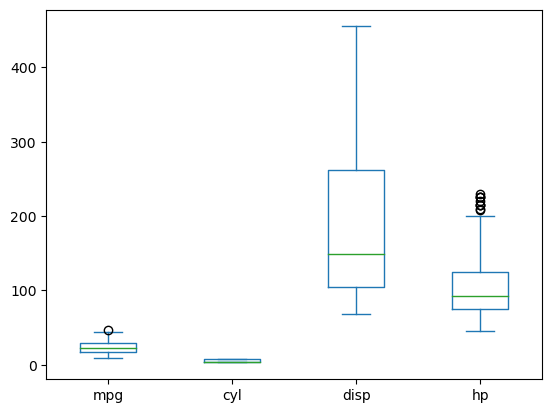

In [45]:
df[['mpg', 'cyl', 'disp', 'hp']].plot(kind = 'box')

C:\Users\Aniket\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


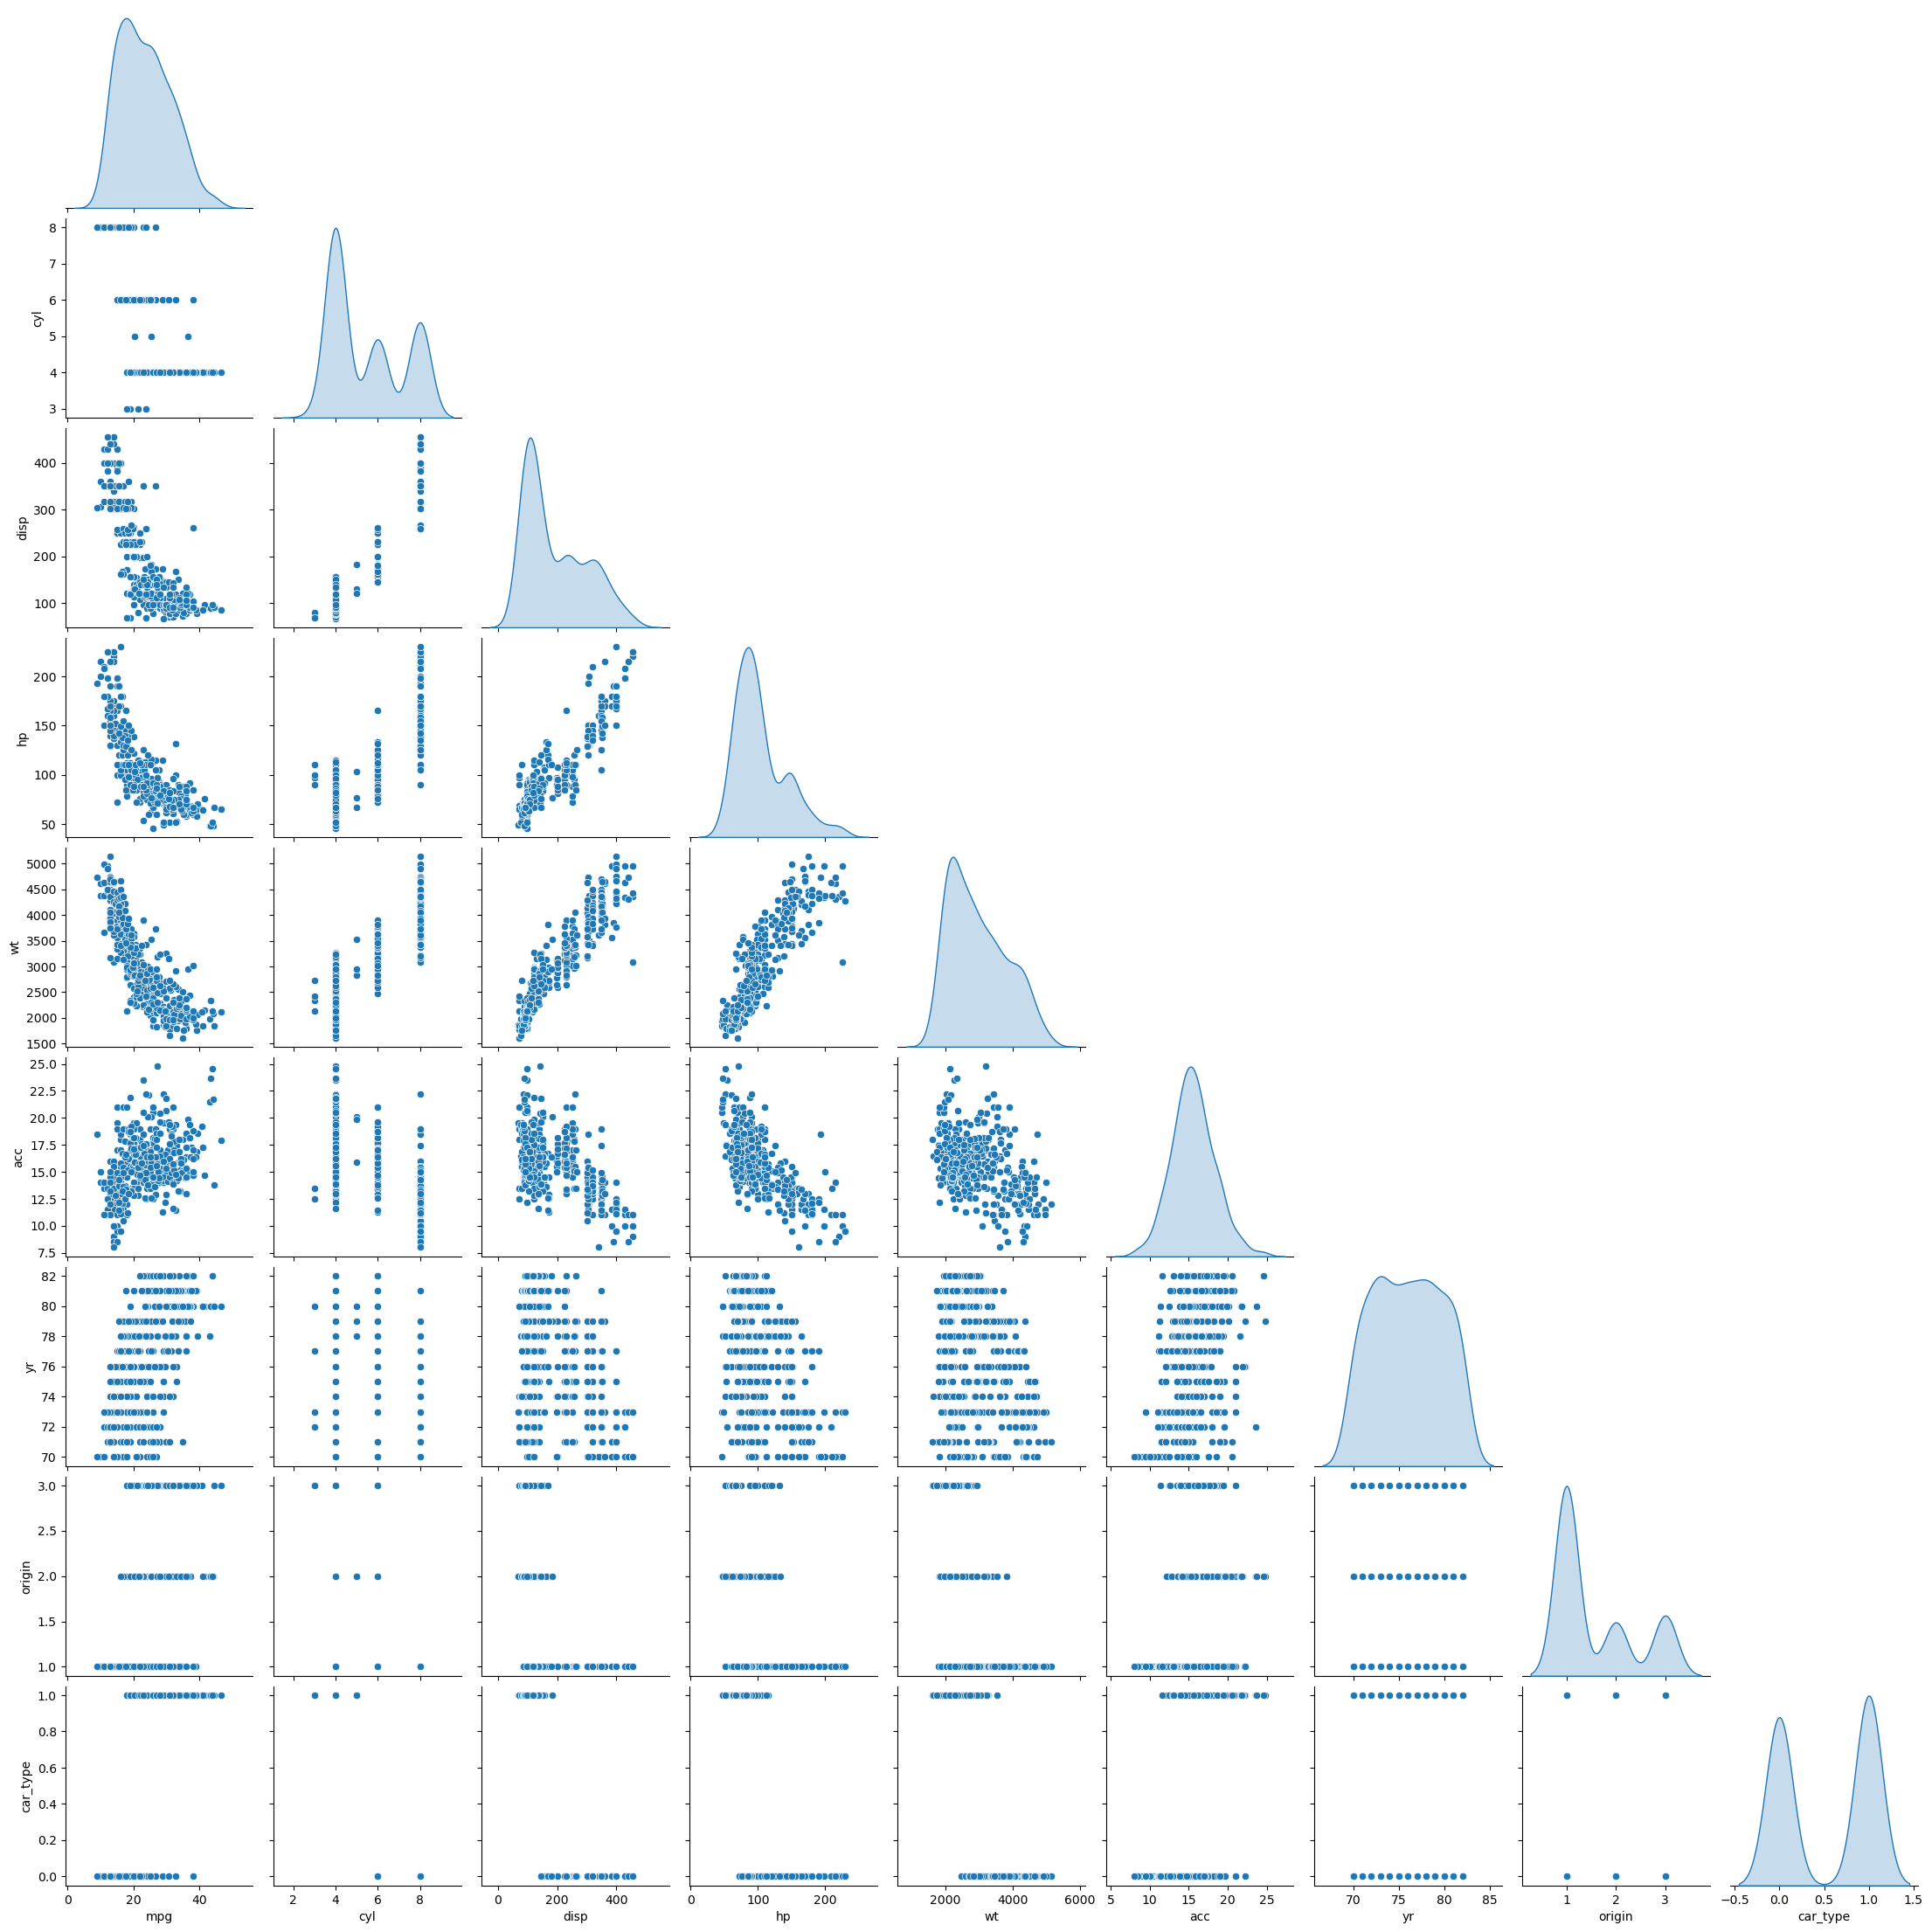

In [52]:
sns.pairplot(df, diag_kind = 'kde',corner  = True);

<font color='blue'> ***Observations*** </font>
- Reltion between mpg and 'hp', 'mpg' and 'wt', 'mpg' and 'disp' are negatively correlated and also shows heteroscadasticity.
- 'mpg' vs 'yr' showing positive correlation.

## <a id='module4'><font color='green'> Train & Test Split </font></a>

In [65]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = 'mpg')
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 555)

## <a id='module5'><font color='green'> Linear Regression </font></a>

In [67]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()

regression_model.fit(X_train, y_train)

LinearRegression()

In [71]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.8343045839637038
0.8479530861186827


In [77]:
# Coefficients for each of the independent attributes
for i in range(len(X.columns)):
    print(f'The coefficient of {X.columns[i]} : {regression_model.coef_[i]}')

The coefficient of cyl : 1.2915895290003696
The coefficient of disp : 0.011185091267253063
The coefficient of hp : -0.0451653033724282
The coefficient of wt : -0.005178266617172152
The coefficient of acc : 0.008996506408284774
The coefficient of yr : 0.7588720527510381
The coefficient of origin : 1.2262935487256708
The coefficient of car_type : 5.3825456782857755


In [85]:
# Intercept for the model
intercept = regression_model.intercept_

print(f"The intercept for model is {intercept}.")

The intercept for model is -28.211506617588913.


In [96]:
y_pred = regression_model.predict(X_test)
print(y_pred)

[30.12549552 32.73529369 19.48508905 18.61096961 25.36079568 26.46611587
 15.72037439 31.05467436 14.71413634 33.69479239 35.26216857 23.40967986
 30.40679521 11.09308118 30.25401357 17.4737696  29.75632956 32.00479613
 12.44179601 20.38826165 27.600687   24.88566724 26.85592528 10.69455682
 29.7798794  35.44735779 32.37698788 26.62374231 25.83050702 25.69412802
 33.62781227 22.58637179 22.50197605 32.74890939 32.96565502 16.55241131
 28.74445724 17.76936075 23.1172033  14.57040586 25.62957773 32.44578258
 22.60727483 29.76988695 32.95460716 25.45817813 34.44483758 29.50205359
 26.50315793 22.72533335  9.42723144 27.35215328 34.81703717 25.8276579
 29.41464845 28.14246557 24.76995535 30.82937114 33.97990158 29.99579011
 25.96324177 27.71892832 14.74991548 13.64207832 18.76916417 17.53765114
 25.850565   26.40073792 16.49341577 27.45662661  9.06152064 24.63169237
  9.14500726 12.99015331 21.72896389 17.18045217 19.90021944 34.27871745
 21.52881376 20.43734708 16.37250922 20.63025991 36.

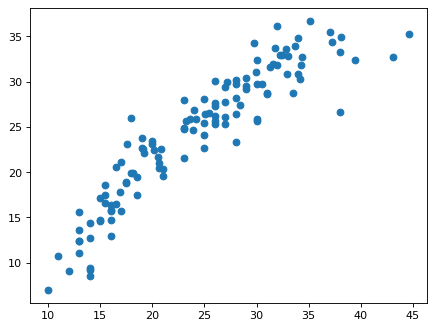

In [110]:
plt.scatter(y_test, y_pred);

- Scatter plot of the predicted y value vs actual y values for the test data.

-----
## <a id='module6'><font color='green'>Linear Regression - OLS Method</font></a>

<font color='blue'> ***Points*** </font>
- We use statsmodel library because of below reasons:
- R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no influence on the predicted variable. - Instead we use adjusted R^2 which removes the statistical chance that improves R^2.
- Scikit does not provide adjusted R^2.

- Omitting some variables which does not have any influence on dependent variable.
- Variables - 'acc', 'yr', 'origin', 'car_type'.

In [118]:
import statsmodels.formula.api as smf
lr1 = smf.ols("mpg ~ cyl + disp + hp + wt", data = df).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     236.3
Date:                Tue, 21 May 2024   Prob (F-statistic):          3.84e-103
Time:                        01:33:56   Log-Likelihood:                -1138.8
No. Observations:                 398   AIC:                             2288.
Df Residuals:                     393   BIC:                             2307.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.8146      1.522     30.101      0.0

<font color = 'blue'> ***Observations*** - </font> 
- Adjusted R^2 is 0.69 ~ 0.70.
- P-value is higher for 'cyl' and 'disp'. This is because of multicollinearity.
- Further leave these two variables and check the score.

In [119]:
lr2 = smf.ols("mpg ~ hp + wt", data = df).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     472.2
Date:                Tue, 21 May 2024   Prob (F-statistic):          1.81e-105
Time:                        01:34:42   Log-Likelihood:                -1139.6
No. Observations:                 398   AIC:                             2285.
Df Residuals:                     395   BIC:                             2297.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.7460      0.791     57.869      0.0

<font color = 'blue'> ***Observations*** </font> 
- No difference is observed even after removing 'cyl' and 'disp'.

-----
## <a id='module7'><font color='green'>Further Analysis</font></a>
- Further will remove outliers and then calculate R^2 and check whether there is any improvement in it or not.
- Inter Quartile Range method is used for removing outliers.

In [121]:
Q1 = df.quantile(0.25)
Q2 = df.quantile(0.50)
Q3 = df.quantile(0.75)

# IQR
IQR = Q3 - Q1
UB = Q3 + 1.5 * IQR # Upper Bound
LB = Q1 - 1.5 * IQR # Lower Bound

In [130]:
# Removing outliers
idx_outliers = np.where((df > UB) | (df < LB))[0]
df.drop(index = idx_outliers, inplace = True)

In [133]:
# Resetting index
df.reset_index(inplace = True,drop = False)

In [138]:
# Using Linear Regression 
X = df[['cyl', 'disp', 'hp', 'wt']] #<--Taking only variables which can influence dependent variable. 
y = df['mpg']

In [143]:
regression_model2 = LinearRegression()
regression_model2.fit(X, y)
regression_model2.score(X,y)

0.7093855252734889

<font color = 'blue'> ***Observations*** </font> 
- R^2 = 0.70938 ~ 0.71 
- There is some improvment in R^2 after removing outliers.

In [149]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
for index, value in enumerate(df.columns):
    print(value, end = " : ")
    print(variance_inflation_factor(df, index))

index : 10.33996170458823
mpg : 70.78289634555387
cyl : 221.85510058316095
disp : 110.98309497796151
hp : 116.43721028485159
wt : 218.15058511794146
acc : 107.72924920468589
yr : 458.0695257306139
origin : 8.957967010399084
car_type : 16.455592343712883


------